# Notebook of Figure 5 of manuscript titled: _Variability of the kinetic energy in seasonally ice-covered oceans_.
by Josue Martinez-Moreno, Camille Lique, Claude Talandier, Quentin
Jamet, & Anne-Marie Treguier

This figure shows a snapshots of the normalized rossby number ($\zeta/f$) and kinetic energy. It highlights the different scales of motion between ice cover and ice free conditions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
import cmocean as cm

In [3]:
grid = xr.open_dataset('/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/ice_canal_HR_output/GRID/domain_zgr_800x1200x50xr.nc')

In [4]:
# Define dimensions
Nx, Ny, Nz = 801, 1201, 32

X = np.ones((Ny,Nx,Nz)) * grid.x_coord.values[:,:,np.newaxis]
Y = np.ones((Ny,Nx,Nz)) * grid.y_coord.values[:,:,np.newaxis]
Z = -np.ones((Ny,Nx,Nz)) * grid.gdept_1d.sel(nav_lev=slice(0,200)).values[:]

## LOAD DATA

In [5]:
from utils import Import_Expt_Front, date_fmt

In [6]:
folder = '/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/ice_canal_HR_output/'
EXF = Import_Expt_Front(folder)

In [7]:
exp_filter = ['expt_001','expt_002','expt_003','expt_004','expt_005','expt_007','expt_008','expt_009','expt_010','expt_250m_test']

In [8]:
dataset_gridU_1d = EXF.import_multipe_expt('grid_U',vars_of_interest=['uoce'],expt_filter=exp_filter,freq='1d',chunks={'time_counter':1})
dataset_gridV_1d = EXF.import_multipe_expt('grid_V',vars_of_interest=['voce'],expt_filter=exp_filter,freq='1d',chunks={'time_counter':1})

In [9]:
dataset_ice_1d = EXF.import_multipe_expt('icemod',vars_of_interest=['iceconc','icevolu'],expt_filter=exp_filter,freq='1d',chunks={'time_counter':1})


In [10]:
def interp_field(x,y):
    x_centered = (x + x.roll(y=1))/2
    y_centered = (y + y.roll(x=1))/2
    return x_centered,y_centered

def vort(u,v,e1t,e2t):
    
    e1t = grid.e1t.squeeze()
    e2t = grid.e2t.squeeze()

    dvdx = (v.diff('x')/e1t[:,:-1])[:,:,:-1,:]
    dudy = (u.diff('y')/e2t[:-1,:])[:,:,:,:-1]

    return dvdx - dudy

In [11]:
u = dataset_gridU_1d.uoce_006
v = dataset_gridV_1d.voce_006

In [12]:
u_c,v_c = interp_field(u,v)

In [13]:
u_c = u_c.rename({"depthu":"deptht"})
v_c = v_c.rename({"depthv":"deptht"})

In [14]:
ζ = vort(u_c,v_c,grid.e1t.squeeze(),grid.e2t.squeeze())

In [15]:
coriolis =1.432e-4
rossby = ζ/coriolis

In [16]:
KE = 1/2 * (u_c**2 + v_c**2)

In [17]:
# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

In [18]:
def format_3daxis(ax):
    ax.patch.set_alpha(0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(3))
    
    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # Plot edges
    edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)

    ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

    # Set labels and zticks
    ax.set(
        xlabel='X [km]',
        ylabel='Y [km]',
        zlabel='Depth [m]',
        zticks=[0, -50, -100, -150],
    )

    # Set zoom and angle view
    ax.view_init(40, -60, 0)
    ax.set_box_aspect((1,1.5,0.6), zoom=0.9)
    
def contour_rasterize(contour):
    for pathcoll in contour.collections:
        pathcoll.set_rasterized(True)

In [19]:
from matplotlib import colors

In [20]:
KE_data_winter = KE.isel(time_counter=85).transpose("y","x","deptht").sel(deptht=slice(0,200))

In [21]:
rossby_data_winter = rossby.isel(time_counter=85).transpose("y","x","deptht").sel(deptht=slice(0,200))

In [22]:
KE_data_summer = KE.isel(time_counter=230).transpose("y","x","deptht").sel(deptht=slice(0,200))

In [23]:
rossby_data_summer = rossby.isel(time_counter=230).transpose("y","x","deptht").sel(deptht=slice(0,200))

In [24]:
ice_winter = dataset_ice_1d.icevolu_006.isel(time_counter=76)
ice_summer = dataset_ice_1d.icevolu_006.isel(time_counter=260)

In [25]:
def format_3daxis(ax):
    ax.patch.set_alpha(0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(3))
    
    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, 10])

    # Plot edges
    edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)

    ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax.plot([xmax, xmax], [ymin, ymin], [zmin, 5], **edges_kw)

    # Set labels and zticks
    ax.set(
        xlabel='X [km]',
        ylabel='Y [km]',
        zlabel='Depth [m]',
        zticks=[0, -50, -100, -150],
    )

    # Set zoom and angle view
    ax.view_init(40, -60)
    ax.set_box_aspect((1,1.5,0.6), zoom=0.9)
#    ax.set_rasterization_zorder(1)

In [26]:
def plot_scale(ax, Rd=8,locx=[0,0],locy=[0,0],locz=[0,0],dz=5, ds=8,label=r"$\overline{4R_D}$"):
    locy = [locy[0]-Rd/2, locy[0]+Rd/2]
    locx_r = [locx[0]-dz, locx[0]+dz]
    locx_r_ = [locx[0]-dz/2, locx[0]+dz/2]
    ax.plot(locx, locy, locz, color='k',linewidth=1)
    ax.plot(locx_r, [locy[0],locy[0]], locz,color='k',linewidth=1)
    for ii in np.arange(ds,Rd,ds):
        ax.plot(locx_r_, [locy[0]+ii,locy[0]+ii], locz,color='k',linewidth=0.7)
    ax.plot(locx_r, [locy[1],locy[1]], locz,color='k',linewidth=1)
    ax.text(locx[0]-40,locy[0]+6,0,label,fontsize=8)

/dev/shm/pbs.3982686.datarmor0/ipykernel_51443/649292268.py:17: UserWarning: Log scale: values of z <= 0 have been masked
  _t = ax1.contourf(
/dev/shm/pbs.3982686.datarmor0/ipykernel_51443/649292268.py:25: UserWarning: Log scale: values of z <= 0 have been masked
  C1 = ax1.contourf(
/dev/shm/pbs.3982686.datarmor0/ipykernel_51443/649292268.py:72: UserWarning: Log scale: values of z <= 0 have been masked
  _t = ax3.contourf(
/dev/shm/pbs.3982686.datarmor0/ipykernel_51443/649292268.py:80: UserWarning: Log scale: values of z <= 0 have been masked
  C3 = ax3.contourf(


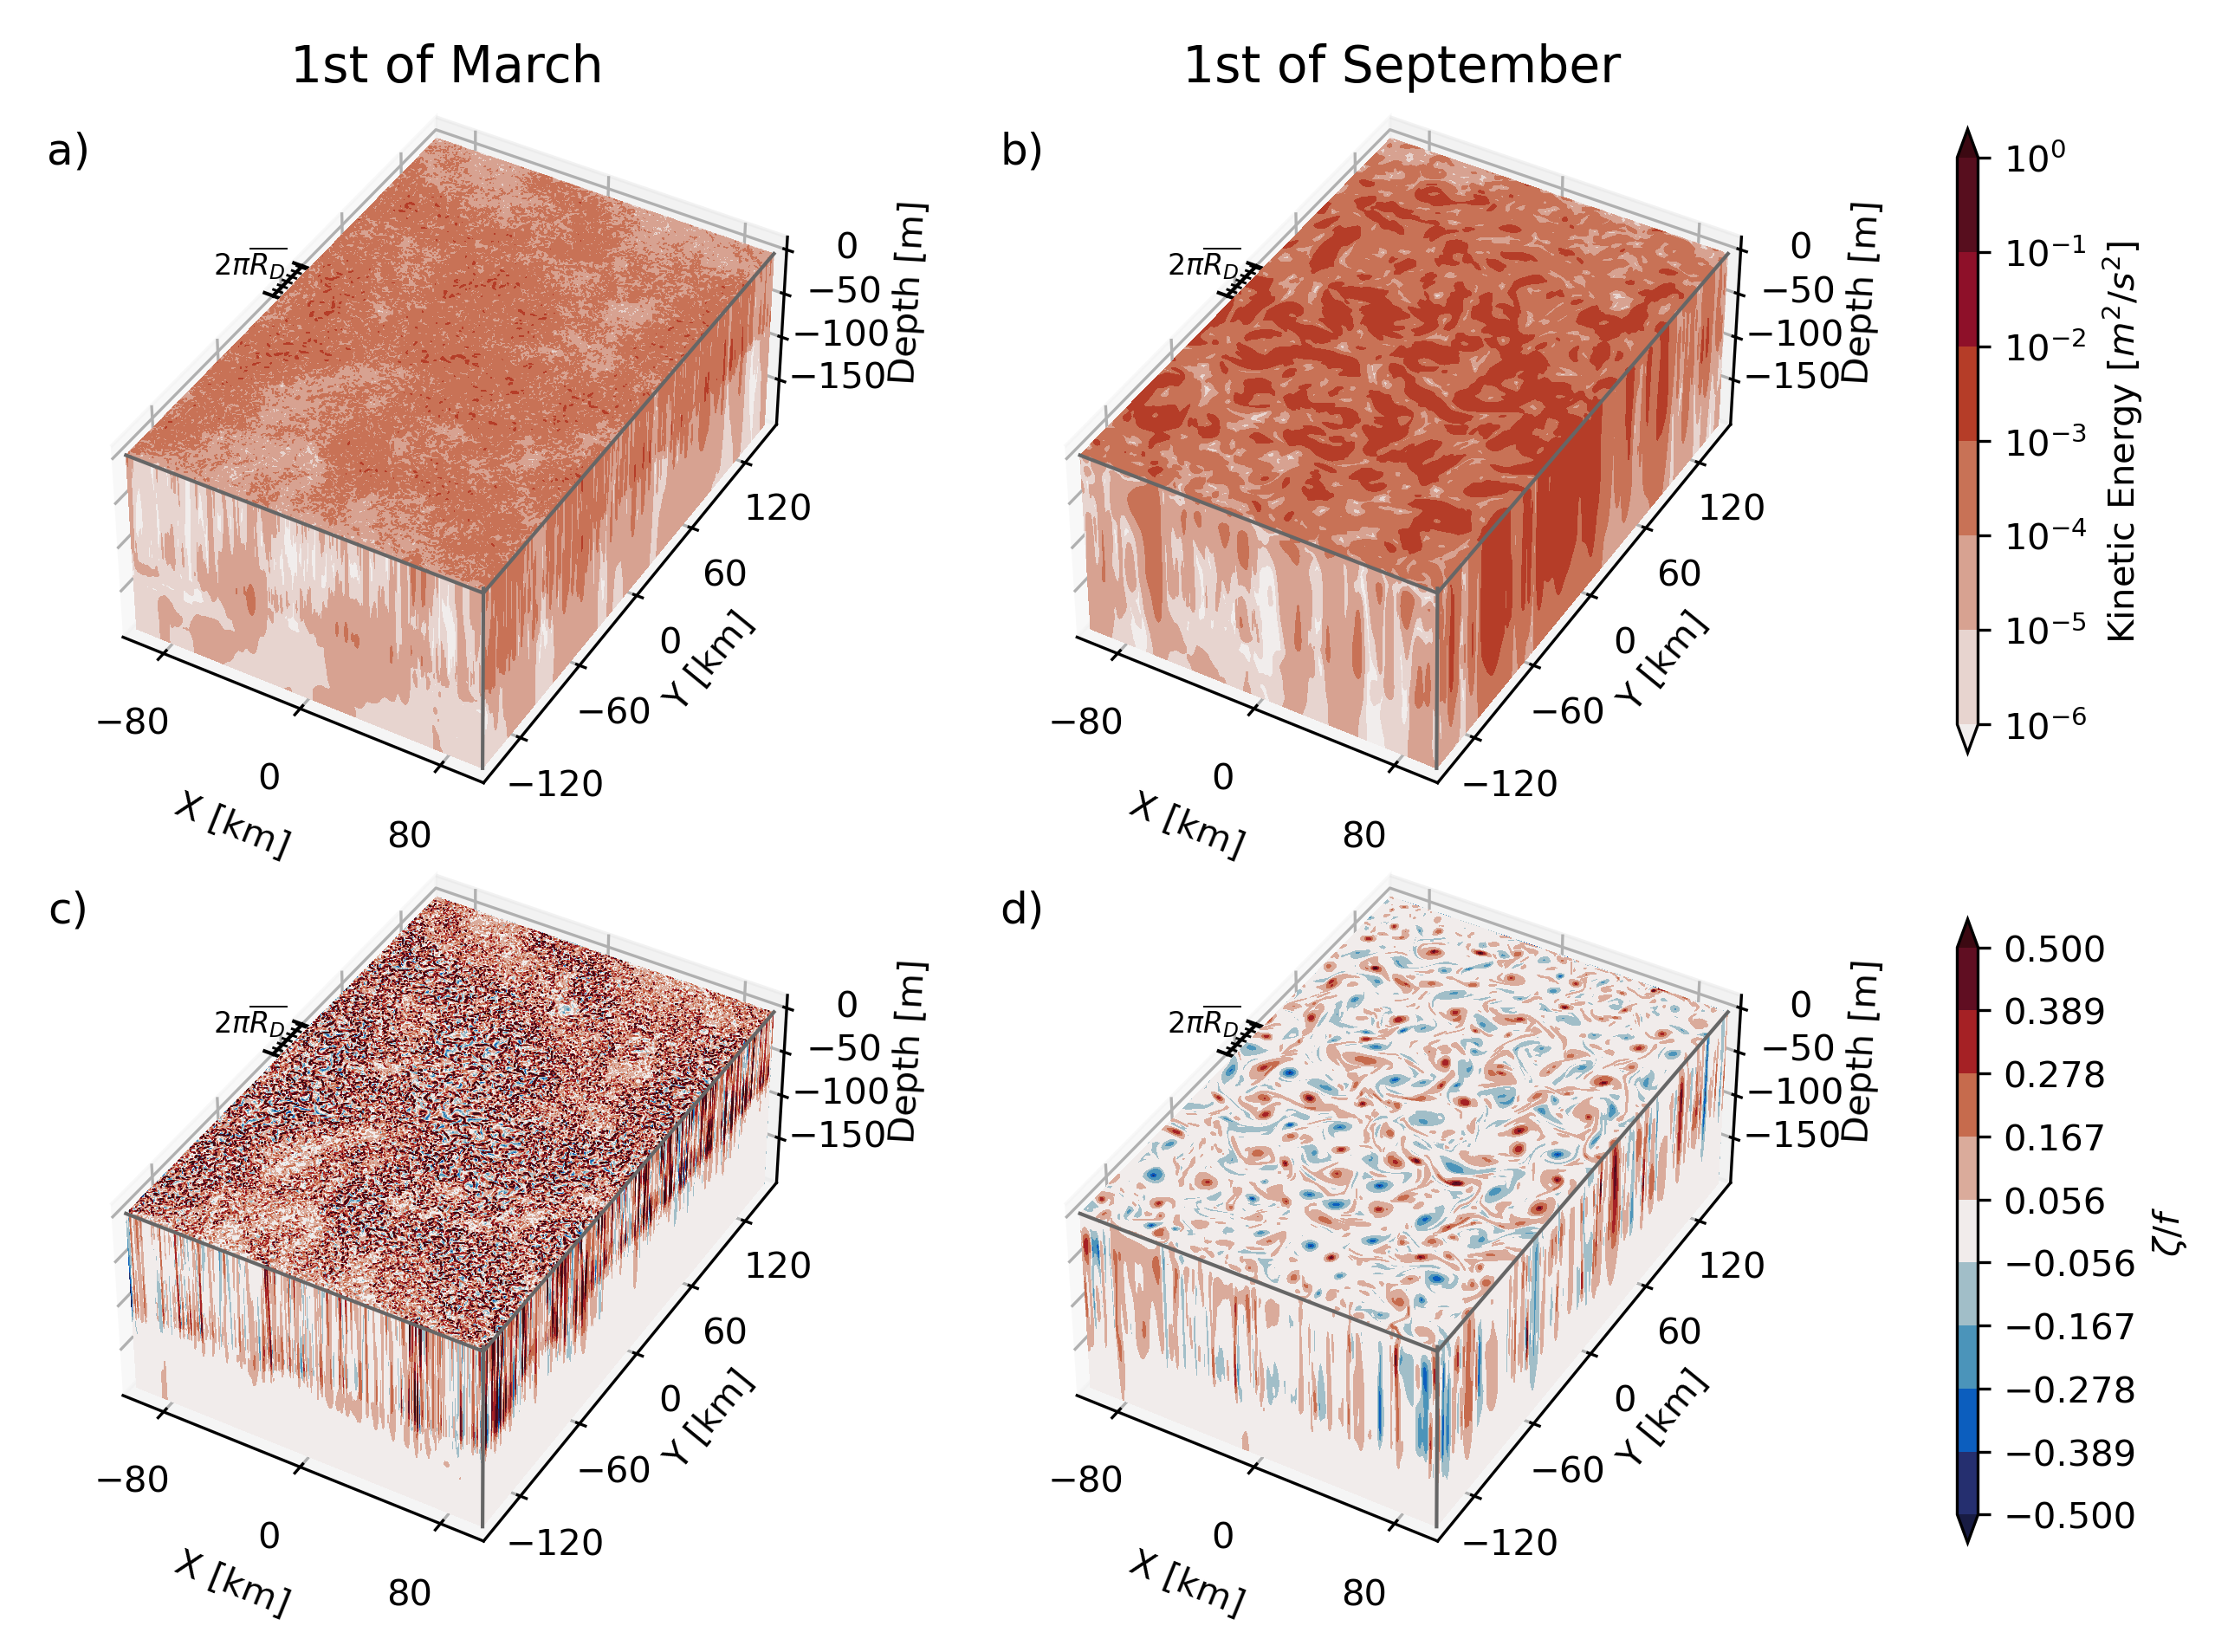

In [27]:

# Create a figure with 3D ax
fig = plt.figure(figsize=(10, 8),dpi=300)

########################################################################
ax1 = fig.add_subplot(221, projection='3d')

kw = {
    'vmin': 1e-6,
    'vmax': 1e0,
    'levels': [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0],
    'cmap': cm.cm.amp,
    'norm': colors.LogNorm(),
    'extend':'both'
}

# Plot contour surfaces
_t = ax1.contourf(
    X[:, :, 0], Y[:, :, 0], KE_data_winter[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax1.contourf(
    X[0, :, :], KE_data_winter[1, :, :].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C1 = ax1.contourf(
    KE_data_winter[:, -1, :].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

# [contour_rasterize(c) for c in [_t, _r, C1] ]

########################################################################
ax2 = fig.add_subplot(223, projection='3d')

kw = {
    'vmin': -0.5,
    'vmax': 0.5,
    'levels': np.linspace(-0.5, 0.5, 10),
    'cmap':cm.cm.balance,
    'extend':'both'
}

# Plot contour surfaces
_t = ax2.contourf(
    X[:-1, :-1, 0], Y[:-1, :-1, 0], rossby_data_winter[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax2.contourf(
    X[0, :-1, :], rossby_data_winter[5, :, :].values, Z[0, :-1, :],
    zdir='y', offset=Y.min(), **kw
)
C2 = ax2.contourf(
    rossby_data_winter[:, -1, :].values, Y[:-1, -1, :], Z[:-1, -1, :],
    zdir='x', offset=X.max(), **kw
)

# [contour_rasterize(c) for c in [_t, _r, C2] ]

########################################################################
ax3 = fig.add_subplot(222, projection='3d')

kw = {
    'vmin': 1e-6,
    'vmax': 1e0,
    'levels': [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0],
    'cmap': cm.cm.amp,
    'norm': colors.LogNorm(),
    'extend':'both'
}

# Plot contour surfaces
_t = ax3.contourf(
    X[:, :, 0], Y[:, :, 0], KE_data_summer[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax3.contourf(
    X[0, :, :], KE_data_summer[1, :, :].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C3 = ax3.contourf(
    KE_data_summer[:, -1, :].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

# [contour_rasterize(c) for c in [_t, _r, C3] ]

########################################################################
ax4 = fig.add_subplot(224, projection='3d')

kw = {
    'vmin': -0.5,
    'vmax': 0.5,
    'levels': np.linspace(-0.5, 0.5, 10),
    'cmap':cm.cm.balance,
    'extend':'both'
}

# Plot contour surfaces
_t = ax4.contourf(
    X[:-1, :-1, 0], Y[:-1, :-1, 0], rossby_data_summer[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax4.contourf(
    X[0, :-1, :], rossby_data_summer[5, :, :].values, Z[0, :-1, :],
    zdir='y', offset=Y.min(), **kw
)
C4 = ax4.contourf(
    rossby_data_summer[:, -1, :].values, Y[:-1, -1, :], Z[:-1, -1, :],
    zdir='x', offset=X.max(), **kw
)

# [contour_rasterize(c) for c in [_t, _r, C4] ]

########################################################################

plot_scale(ax1, Rd=4.5*2*np.pi,locx=[-100,-100],locy=[0,0],locz=[10,10],dz=5, ds=4.5,label=r"$2\pi\overline{R_D}$")
plot_scale(ax2, Rd=4.5*2*np.pi,locx=[-100,-100],locy=[0,0],locz=[10,10],dz=5, ds=4.5,label=r"$2\pi\overline{R_D}$")
plot_scale(ax3, Rd=4.5*2*np.pi,locx=[-100,-100],locy=[0,0],locz=[10,10],dz=5, ds=4.5,label=r"$2\pi\overline{R_D}$")
plot_scale(ax4, Rd=4.5*2*np.pi,locx=[-100,-100],locy=[0,0],locz=[10,10],dz=5, ds=4.5,label=r"$2\pi\overline{R_D}$")


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()


[format_3daxis(ax) for ax in [ax1,ax2,ax3,ax4]]


# Colorbar

cax = fig.add_axes([0.91, 0.53, 0.008, 0.3])
fig.colorbar(C1, cax=cax, orientation='vertical')
cax.set_ylabel('Kinetic Energy [$m^2/s^2$]')


cax = fig.add_axes([0.91, 0.15, 0.008, 0.3])
fig.colorbar(C2, cax=cax, orientation='vertical')
cax.set_ylabel('$\zeta/f$')


ax1.text2D(0.05, 0.85, 'a)', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes,fontsize=12)
ax3.text2D(0.05, 0.85, 'b)', horizontalalignment='center', verticalalignment='center', transform = ax3.transAxes,fontsize=12)
ax2.text2D(0.05, 0.85, 'c)', horizontalalignment='center', verticalalignment='center', transform = ax2.transAxes,fontsize=12)
ax4.text2D(0.05, 0.85, 'd)', horizontalalignment='center', verticalalignment='center', transform = ax4.transAxes,fontsize=12)


plt.subplots_adjust(hspace=-0.1,wspace=-0.1)

ax1.text2D(0.5, 0.95, '1st of March', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes,fontsize=14)
ax3.text2D(0.5, 0.95, '1st of September', horizontalalignment='center', verticalalignment='center', transform = ax3.transAxes,fontsize=14)

# Save Figure
plt.savefig('./figures/Fig_2_KE_rossby.png', dpi=300, bbox_inches='tight')

**Figure 5.** Snapshot on KE (top; panels a and  b) and normalized vorticity ($\zeta/f$) (bottom; panels c and d) on the 1st of March (left column) and the 1st of September (right column). The time mean Rossby radius wavelength is shown in all panels ($\lambda_r = 2\pi \overline{R_D}$).

## Extra diagnostics

In [28]:
abs(rossby_data_summer).max().compute()

<xarray.DataArray ()> Size: 8B
array(1.31889012)
Coordinates:
    time_centered  object 8B 0002-08-02 12:00:00
    time_counter   object 8B 0002-08-02 12:00:00

In [29]:
abs(rossby_data_winter).max().compute()

<xarray.DataArray ()> Size: 8B
array(1.75524134)
Coordinates:
    time_centered  object 8B 0002-03-10 12:00:00
    time_counter   object 8B 0002-03-10 12:00:00

In [30]:
abs(rossby_data_summer).mean().compute()

<xarray.DataArray ()> Size: 8B
array(0.07212775)
Coordinates:
    time_centered  object 8B 0002-08-02 12:00:00
    time_counter   object 8B 0002-08-02 12:00:00

In [31]:
abs(rossby_data_winter).mean().compute()

<xarray.DataArray ()> Size: 8B
array(0.11435388)
Coordinates:
    time_centered  object 8B 0002-03-10 12:00:00
    time_counter   object 8B 0002-03-10 12:00:00

## KE mean 

In [32]:
KE_data_winter.isel(deptht=slice(0,22)).mean().compute()

<xarray.DataArray ()> Size: 4B
array(0.00016544, dtype=float32)
Coordinates:
    time_centered  object 8B 0002-03-10 12:00:00
    time_counter   object 8B 0002-03-10 12:00:00

In [33]:
KE_data_summer.isel(deptht=slice(0,22)).mean().compute()

<xarray.DataArray ()> Size: 4B
array(0.00102417, dtype=float32)
Coordinates:
    time_centered  object 8B 0002-08-02 12:00:00
    time_counter   object 8B 0002-08-02 12:00:00